In [1]:
# importing the required libraries
import numpy as np
import pandas as pd

In [2]:
# reading the dataset
df=pd.read_csv('Dataset_Question3.txt',sep=" ",header=None)

In [3]:
df_new = df[df[1]=="qid:4"]
df_new

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,NaN
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,NaN
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,NaN
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,NaN


In [4]:
# relevant-judgement-labels
relevanceJudgementLabel = df_new[0].unique()
relevanceJudgementLabel

array([0, 1, 3, 2], dtype=int64)

In [5]:
import math

# Get unique relevance scores
relevanceJudgementLabel = df_new[0].unique()

# Calculate number of files based on factorial of count of each relevance score
fileNum = 1
labelSizes = []
for relScore in relevanceJudgementLabel:
    count = sum(df_new[0] == relScore)
    print("Size of label ", relScore, count)
    labelSizes.append(count)
    fileNum *= math.factorial(count)

Size of label  0 59
Size of label  1 26
Size of label  3 1
Size of label  2 17


In [6]:
# Calculate final sorted dataframe and save to CSV
df_final = df_new.sort_values(by=0, ascending=False).reset_index(drop=True)
df_final.to_csv('Q2_2.csv')
print("Total files:", fileNum)

Total files: 19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [7]:
def DCG(df, n):
    dcg = 0
    for itr in range(n):
        relevance = df[0][itr]
        rank = itr + 1
        dcg += (2**relevance - 1) / math.log2(rank + 1)
    return dcg

In [8]:
nDCG50=DCG(df,50)/DCG(df_final,50)
nDCG_whole=DCG(df_new,len(df_new))/DCG(df_final,len(df_new))

In [9]:
print("nDCG of 50 data", nDCG50)
print("nDCG of whole dataset", nDCG_whole)

nDCG of 50 data 0.35612494416255847
nDCG of whole dataset 0.5784691984582591


In [10]:
files = open('Dataset_Question3.txt',encoding="unicode_escape")
fileData = files.readlines()

In [11]:
feedback = []
feature_scores = []

for itr in fileData:
    qid_start = itr.find("qid:")
    qid_end = itr.find("1:")
    qid = itr[qid_start + 4 : qid_end - 1]
    if qid == "4":
        score_start = itr.find("75:")
        score_end = itr.find("76:")
        score = float(itr[score_start + 3 : score_end - 1])
        
        feedback.append(int(itr[0]))
        feature_scores.append(score)
        
        if score == 0.0:
            print(entry)


In [12]:
#defining the variables for relevanceLabel and 75-features
relevanceLabel = []
feature75 = []

In [13]:

for itr in fileData:
    i = itr.find("qid:") + 4
    j = itr.find("1:") - 1
    
    if itr[i:j] == "4":
        x = float(itr[itr.find("75:") + 3:itr.find("76:") - 1])
        relevanceLabel.append(int(itr[0]))
        feature75.append(x)

In [14]:
# Initialize variables to calculate precision and recall
precision=[]
recall=[]
relevantNum = 0

In [15]:
# Sort the relevance labels based on the feature_75 scores in descending order
sortedLabels = [x for _, x in sorted(zip(feature75, relevanceLabel), reverse=True)]

# Calculate the total number of relevant documents
for i in range(len(sortedLabels)):
    if sortedLabels[i] != 0:
        relevantNum=relevantNum+1

# Initialize variables to calculate precision and recall
totalNum = 0
curRel = 0

# Calculate precision and recall for each document in the sorted list
for i in range(len(sortedLabels)):
    totalNum += 1
    
    if sortedLabels[i] != 0:
        curRel += 1
    
    # Calculate precision and recall for current document
    prec = curRel / totalNum
    rec = curRel / relevantNum
    
    # Append precision and recall to respective lists
    precision.append(prec)
    recall.append(rec)

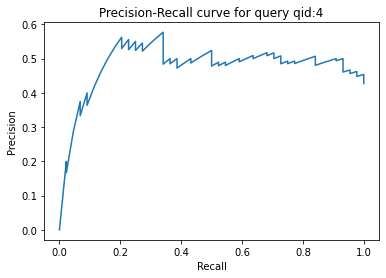

In [16]:
# Plot the Precision-Recall curve

import matplotlib.pyplot as plt
plt.title("Precision-Recall curve for query qid:4")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.plot(recall, precision)
plt.show()